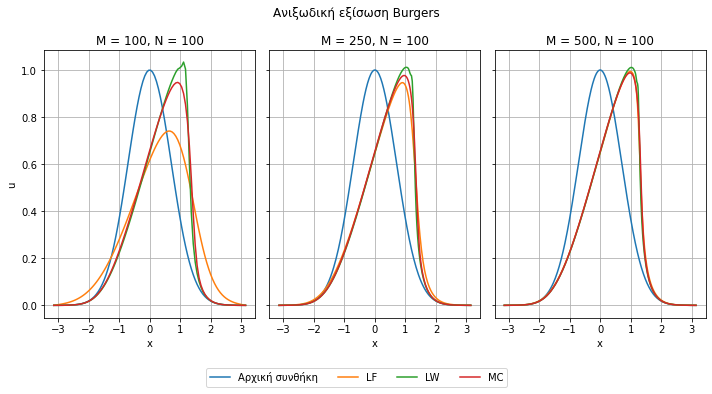

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def lax_friedrichs_scheme(nx, nt, dx, dt, u_initial):
    
    u = u_initial.copy()
    u_data = [u.copy()]

    for n in range(nt):
        un = u_data[n].copy()
        for i in range(1, nx - 1):
            u[i] = 0.5 * (un[i + 1] + un[i - 1]) - 0.25 * dt / dx * (un[i + 1]**2 - un[i - 1]**2)

        u_data.append(u.copy())

    return u_data

#Σχήμα Lax-Wendroff
def lax_wendroff_scheme(nx, nt, dx, dt, u_initial):

    u = u_initial.copy()

    u_data = [u.copy()]

    for n in range(nt):
        un = u_data[n].copy()
        for i in range(1, nx - 1):
            u[i] = un[i] - 0.25 * dt / dx * (un[i + 1]**2 - un[i - 1]**2) 
            + 0.125 * (dt / dx)**2 * ((un[i + 1] + un[i]) * (un[i + 1]**2 - un[i]**2) 
                                    - (un[i] + un[i - 1]) * (un[i]**2 - un[i - 1]**2))

        u_data.append(u.copy())

    return u_data


# Σχήμα MacCormack
def maccormack_scheme(nx, nt, dx, dt, u_initial):
    
    u = u_initial.copy()
    u_data = [u.copy()]

    for n in range(nt):
        un = u_data[n].copy()
        u_star = un.copy()
        for i in range(1, nx - 1):
            u_star[i] = un[i] - 0.5 * dt / dx * (un[i]**2 - un[i - 1]**2)
        for i in range(1, nx - 1):
            u[i] = 0.5 * (un[i] + u_star[i]) - 0.25* dt / dx * (u_star[i]**2 - u_star[i - 1]**2)

        u_data.append(u.copy())

    return u_data


# Παράμετροι
nt = 100  # Αριθμός βημάτων χρόνου
dt = 0.01  # Μέγεθος βήματος χρόνου


nx_values = [100, 250, 500] # Αριθμός σημείων πλέγματος χώρου
#fig, ax = plt.subplots(1, 3, figsize=(12, 5)) 
# keep the same y axis for all subplots
fig, ax = plt.subplots(1, 3, figsize=(10, 5), sharey=True)


for i, nx in enumerate(nx_values):
    
    x = np.linspace(-np.pi, np.pi, nx) # Πλέγμα χώρου
    dx = (x[-1] - x[0]) / nx # Βήμα χώρου
    u_initial = np.exp(-x**2) # Αρχική συνθήκη

    u_LF = lax_friedrichs_scheme(nx, nt, dx, dt, u_initial)
    u_LW = lax_wendroff_scheme(nx, nt, dx, dt, u_initial)
    u_MC = maccormack_scheme(nx, nt, dx, dt, u_initial)

    ax[i].plot(x, u_initial, label="Αρχική συνθήκη")
    ax[i].plot(x, u_LF[-1], label="LF")
    ax[i].plot(x, u_LW[-1], label="LW")
    ax[i].plot(x, u_MC[-1], label="MC")
    ax[i].set_xlabel("x")
    ax[i].set_title(f"M = {nx}, N = {nt}")
    ax[i].grid(True)

ax[0].set_ylabel("u")

fig.suptitle("Ανιξωδική εξίσωση Burgers", fontsize=12)
handles, labels = ax[0].get_legend_handles_labels()
fig.legend(handles, labels, loc="center", bbox_to_anchor=(0.5, - 0.05), ncol=4)
fig.tight_layout()
fig.savefig('inviscid_Burgers_numerical.png', dpi=300, bbox_inches='tight')

plt.show()
